## Fastning degree
A factor in how prone an area is to flooding is the so called _fastning degree_ (Befæstelsesgrad). The fastning degree indicates how much of an area that has bricks, concrete or other surfaces where water can't drain. 

A high fastning degree means that the water must go to the sewer, and increases the likelihood of flooding. 

In [3]:
# Code reloading and path
import os, sys
%load_ext autoreload
%autoreload 2
sys.path.append(os.path.pardir)

### The data
The danish ministry for the enviroment has a data set which includes the fastning degree for an area. 

The data can be viewed in a [WMS map](http://miljoegis.mim.dk/spatialmap?mapheight=655&mapwidth=1924&label=&ignorefavorite=true&profile=miljoegis-klimatilpasningsplaner&selectorgroups=nedboer&layers=theme-gst-dtkskaerm_daempet+theme-klimatilp-raster-arealanvendelse+userpoint+userline+userpolygon+bufferzone+smalluserpointsearch+smalluserlinesearch+smalluserpolygonsearch+smalluserpointfound+smalluserlinefound+smalluserpolygonfound+selectorpoint+selectorline+selectorpolygon+selectorbufferzone+redline-line+redline-point+redline-polygon+redline-circle+spatialanalyze-line+spatialanalyze-point+spatialanalyze-polygon+fr-dl-line+fr-dl-point+fn-dl-line+fn-dl-point&opacities=1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1+1&mapext=482143.8030704+6138988.00104+485214.1969296+6140027.99896&maprotation=)

It is also possible to download it as a [txt file](https://mst.dk/service/miljoegis/hent-data/)

We will use the WMS service for our purposes since we want to display an image and a number to the end user

In [122]:
# First get an adresse
from data_retrival import addressToLatLong
x, y = addressToLatLong('kjærmarken 103, 6771 gredstedbro')

The WMS api does not support the same _EPSG:3857_ projection that the hollwing api supported. Instead of going from a pair of latitude and longitude directly to the supported _EPSG:25832_ projection we convert to _EPSG:3857_ first and compute the bounding box such that it matches those form the other risk factors. 

Check _getFastningImg_ source for details

/usr/local/lib/python3.7/site-packages/pyproj/transformer.py:92: UserWarning: `from_crs` is deprecated and will be removed in 2.2.0. Please use `from_proj` instead.
  "`from_crs` is deprecated and will be removed in 2.2.0. "


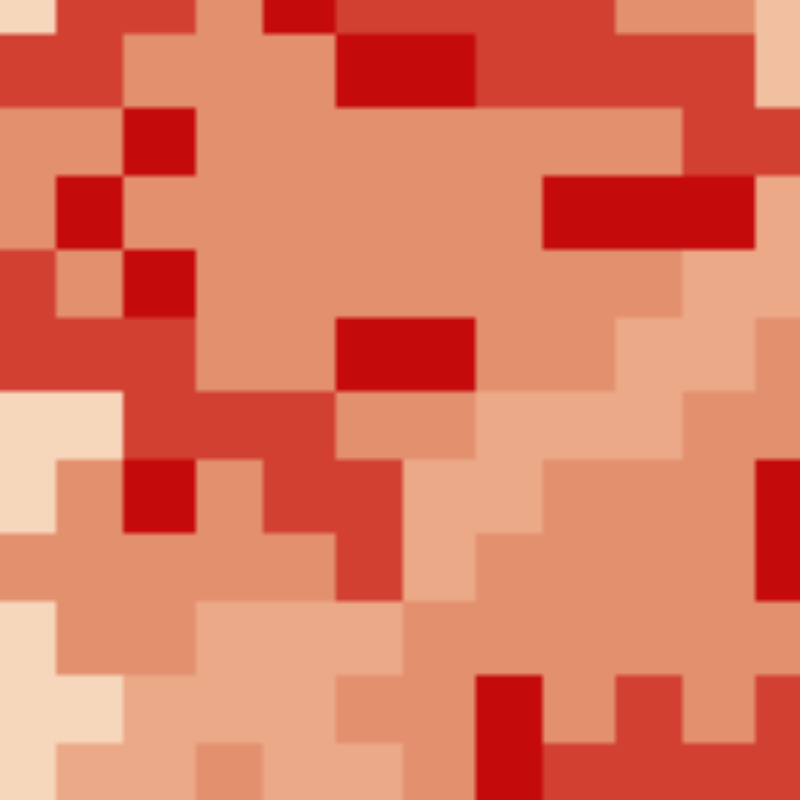

In [137]:
from fastning import getFastningImg
img = getFastningImg(x,y)
img

We want to present an image to the end user that shows how the area is computed. We do this by first retrieving a satelite image of the area and 
placing a semi-transperent copy of the fastning image on top of it. 

/usr/local/lib/python3.7/site-packages/pyproj/transformer.py:92: UserWarning: `from_crs` is deprecated and will be removed in 2.2.0. Please use `from_proj` instead.
  "`from_crs` is deprecated and will be removed in 2.2.0. "


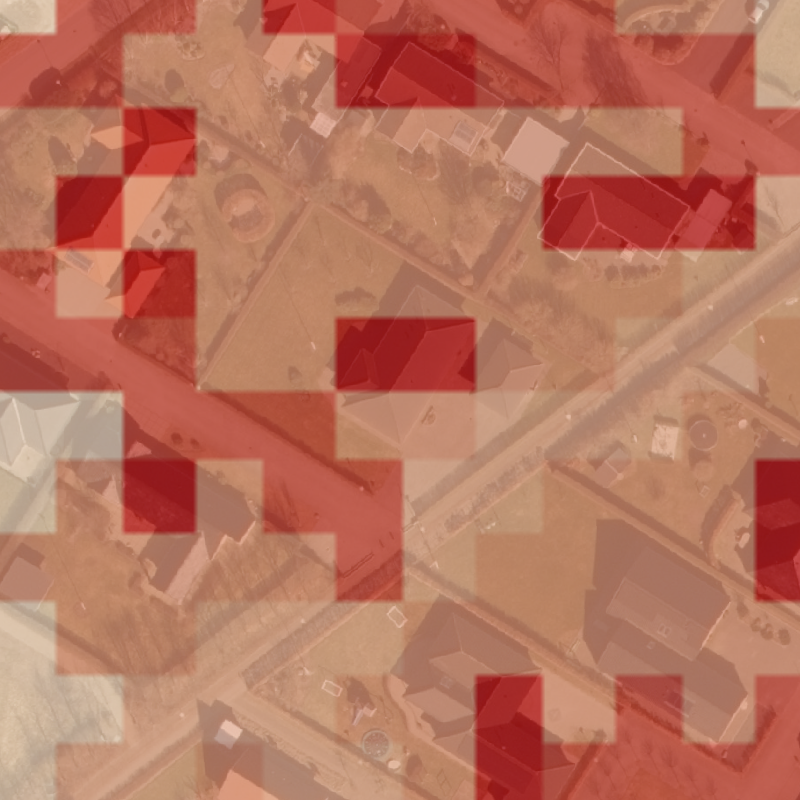

In [151]:
from fastning import  mapImg
mapImg(img, x, y)

#### Extracting values from the image
The fastning degree of the area is encoded in the color of the image. 
Sadly the colors does not match exactly the mapping provided by [MST](https://mst.dk) which can be seen below. 
The keys are percentages and the arrays are RGBA colors

In [152]:
from fastning import fastningMapping
fastningMapping

,Red,Green,Blue,Alpha
100,207,20,22,255
80,212,42,35,255
70,220,67,53,255
60,224,95,73,255
50,232,121,94,255
35,236,145,114,255
20,242,170,139,255
10,246,193,163,255
0,255,236,215,255


As seen from the image the fasting is computed as square cells, which means that we can rezise the image down to a small size such as (25, 25) and still get the samme degree of information and getting a much faster computation. 

The computation involves iteration through each pixel and seeing which of 
the color values are closets. 

In [156]:
from fastning import imageToMatrix
mat = imageToMatrix(img, size=20)
mat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,10.0,70.0,70.0,70.0,70.0,35.0,35.0,100.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,35.0,35.0,35.0,35.0,10.0
1,70.0,70.0,70.0,35.0,35.0,35.0,35.0,35.0,100.0,100.0,100.0,100.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,10.0
2,70.0,70.0,70.0,35.0,35.0,35.0,35.0,35.0,100.0,100.0,100.0,100.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,10.0
3,35.0,35.0,35.0,100.0,100.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,70.0,70.0,70.0
4,35.0,100.0,100.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,50.0,100.0,100.0,100.0,100.0,100.0,20.0
5,35.0,100.0,100.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,50.0,100.0,100.0,100.0,100.0,100.0,20.0
6,70.0,35.0,35.0,100.0,100.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,20.0,20.0,20.0
7,70.0,35.0,35.0,100.0,100.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,20.0,20.0,20.0
8,70.0,70.0,70.0,70.0,70.0,35.0,35.0,35.0,100.0,100.0,100.0,100.0,35.0,35.0,35.0,20.0,20.0,20.0,20.0,35.0
9,70.0,70.0,70.0,70.0,70.0,35.0,35.0,35.0,100.0,100.0,100.0,100.0,35.0,35.0,35.0,20.0,20.0,20.0,20.0,35.0


from fastning import getF

In [170]:
from fastning import getFastning
getFastning(x, y, base64=False)

{'total_area_fastning': 45.56,
 'image': <PIL.Image.Image image mode=RGB size=800x800 at 0x13262FF50>,
 'house_area_fastning': 43.96449704142013}